<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>

# **Taller guiado de visualización**

Este taller guiado tiene como objetivo hacer un acercamiento práctico del uso del paquete de Seaborn y Matplotlib. Lo invito a interactuar y experimentar libremente con esta herramienta de aprendizaje.En la parte superior derecha encontrará un botón que dice "Añadir a Drive", de esa manera podrá guardar y editar el contenido de este notebook.

En este taller guiado veremos como:

* Comprender los fundamentos de los objetos de matplotlib y su utilidad.
* Utilizar seaborn para crear una amplia variedad de visualizaciones que permitan entender los datos.


## **1. Instalar e importar los paquetes necesarios**

In [1]:
#!pip install -U matplotlib

In [2]:
#!pip install seaborn --upgrade

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

In [4]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn',sns.__version__)

Python 3.11.12
NumPy 2.0.2
Pandas 2.2.2
Matplotlib 3.10.0
Seaborn 0.13.2


## **2. Cargar datos**

Para este taller vamos a emplear el dataset Iris y el dataset housepricing, para mayor información consulte:

* https://www.kaggle.com/ashydv/housing-dataset

* https://archive.ics.uci.edu/ml/datasets/Iris

In [5]:
variables = ['sepal_length','sepal_width','petal_length','petal_width','species']
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names= variables)

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Resumen

El dataset Iris está conformado por 150 observaciones. En este dataset hay 3 tipos de flores identificadas en la variable Species. Para cada observación se tomaron 4 mediciones, ancho y largo del pétalo y ancho y largo del sépalo. El objetivo con este dataset es relacionar las mediciones de la flor con su especie. A continuación encontrará un breve resumen.

|Variable|Descripción|Tipología|
|---|---|---|
|Sepal.Length|Largo del sépalo (cm)|Cuantitativa continua|
|Sepal.Width|Ancho del sépalo (cm)|Cuantitativa continua|
|Petal.Length|Largo del pétalo (cm)|Cuantitativa continua|
|Petal.Width|Ancho del pétalo (cm)|Cuantitativa continua|
|Species|Especie de la flor|Cualitativa nominal|

In [9]:
housing = pd.read_csv("https://raw.githubusercontent.com/HarryVargas96/UdeCataluna/main/Housing.csv")

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Resumen

El dataset housing está conformado por 13 variables y 545 observaciones. En este dataset se resumen algunas características de viviendas y el precio de las viviendas. El objetivo es analizar que variables son más importantes para valorar un inmueble.

|Variable|Descripción|Tipología|
|---|---|---|
|price| Precio (USD)|Cuantitativa continua|
|area|Área del predio (pies cuadrados)|Cuantitativa continua|
|bedrooms|Cantidad de habitaciones|Cuantitativa discreta|
|bathrooms|Cantidad de baños|Cuantitativa discreta|
|stories|Cantidad de pisos-niveles|Cuantitativa discreta|
|mainroad|Ubicación sobre una calle principal|Cualitativa binaria|
|guestroom|Cuarto para invitados|Cualitativa binaria|
|basement|Sotano|Cualitativa binaria|
|hotwaterheating|Calentador de agua|Cualitativa binaria|
|airconditioning|Aire acondicionado|Cualitativa binaria|
|parking|Cantidad de parqueaderos|Cuantitativa discreta|
|prefarea|Barrio o zona privilegiada de la ciudad|Cualitativa binaria|
|furnishing status|Estado de amoblamiento|Cualitativa ordinal|

## **3. Matplotlib**

Primero veremos algunas funcionalidades importantes de Matplolib. Cabe aclarar que el enfoque de este Notebook se dará a la visualización usando Seaborn, antes de eso veremos los métodos y objetos comunes en ambas librerías y su manipulación.

Este es método funcional, es la primera y la forma más simple de hacer gráficas con Matplotlib. Los parámetros de la función son controlados a través de funciones como `hist(), xlabel() y show()`. Recuerde que en este caso para llamar las funciones es vital el alias plt.

Existen una gran cantidad de tipos de gráficos posibles, a continuación se listan los más comunes.

`hist()`

`plot()`

`scatter()`

`barplot()`

`boxplot()`

Para consultar ejemplos puede ir a:

https://matplotlib.org/stable/gallery/index.html

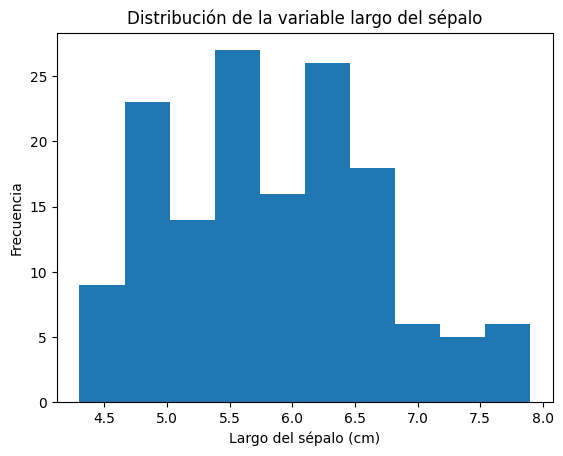

In [13]:
plt.hist(iris['sepal_length']) # Se determinar el tipo de gráfica a realizar y se pasan los datos

plt.xlabel('Largo del sépalo (cm)') # Se añaden tantos elementos como se desee
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable largo del sépalo')
plt.show();
# ; evita que aparezca texto

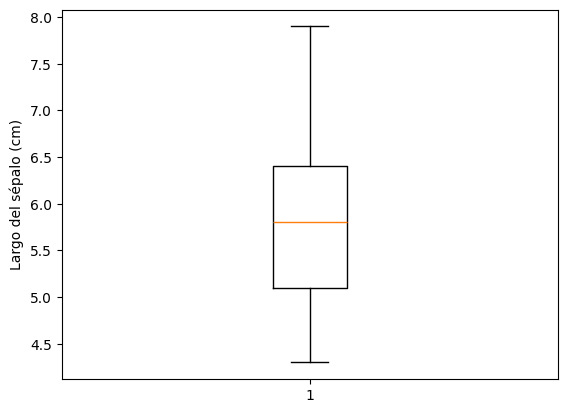

In [14]:
plt.boxplot(iris['sepal_length']) # Se determinar el tipo de gráfica a realizar y se pasan los datos

plt.ylabel('Largo del sépalo (cm)') # Se añaden tantos elementos como se desee

plt.show();
# ; evita que aparezca texto

Ahora, veremos el segundo método para trabajar con matplotlib, este es el más poderoso y más usado. El método orientado a objetos es especialmente útil para crear canvas con varios gráficos en el. Esta lógica consiste en declarar un objeto de clase *figure* y luego emplear algunos métodos o atributos sobre este objeto.

Primero se crea un `Figure`, este es un canvas o área de trabajo en limpio, este es un contenedor de todo lo que vemos en pantalla. Luego se agregan gráficos internos o ejes, que se conocen como `axes`, esta parte es la encargada de sostener los datos.



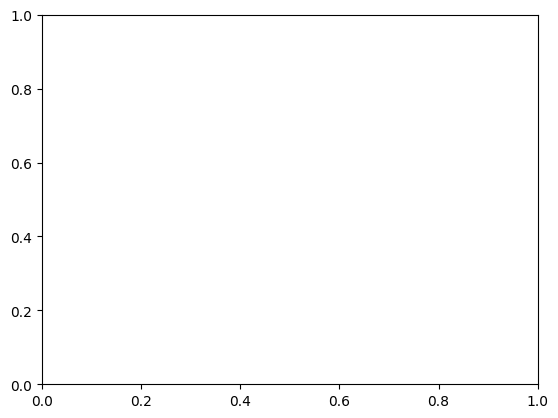

In [15]:
# Aqui dentro se puede modificar, figsize, calidad de la visualización o
# la cantidad subgráficas, por defecto mostrará solamente 1

fig, axes = plt.subplots()

Text(0, 0.5, 'Frecuencia')

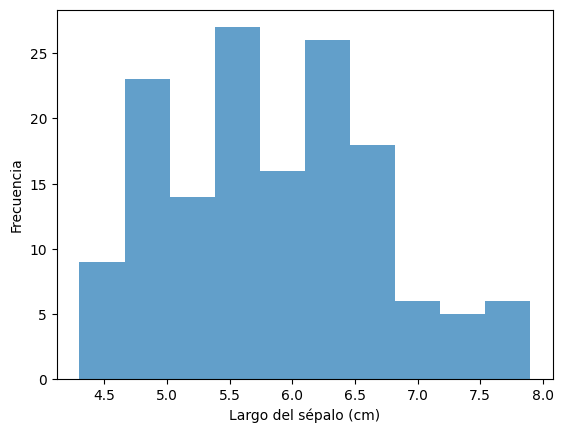

In [16]:

fig, axes = plt.subplots()


# Se determina el tipo de gráfico o geometría para graficar
axes.hist(iris['sepal_length'],
          alpha = 0.7);

axes.set_xlabel('Largo del sépalo (cm)')
axes.set_ylabel('Frecuencia')

# Note que los elementos se adicionan sobre el objeto axes creado previamente


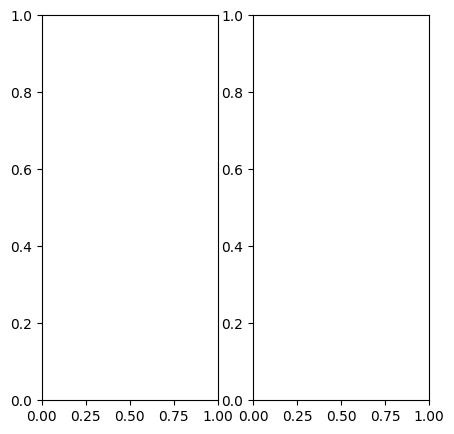

In [17]:
#Crear múltiples subplots, ambos comandos crean el mismo canvas
# Intente crear arreglos de varias dimensiones y tamaño del lienzo cambiando el parámetro figsize

#fig, axes = plt.subplots (nrows=1,ncols=2)
fig, axes = plt.subplots (1,2, figsize = (5,5))

In [18]:
# Al revisar el objeto axes podemos observar que es un arreglo con las dimensiones especificadas

axes

array([<Axes: >, <Axes: >], dtype=object)

Vamos a crear dos visualizaciones en el mismo lienzo usando el método orientado a objetos de Matplotlib. Recuerde que el objeto axes es un arreglo, para acceder a las posiciones de un arreglo de longitud 2 usamos la notación:

```
array[0]
array[1]
```



Text(0, 0.5, 'Frecuencia')

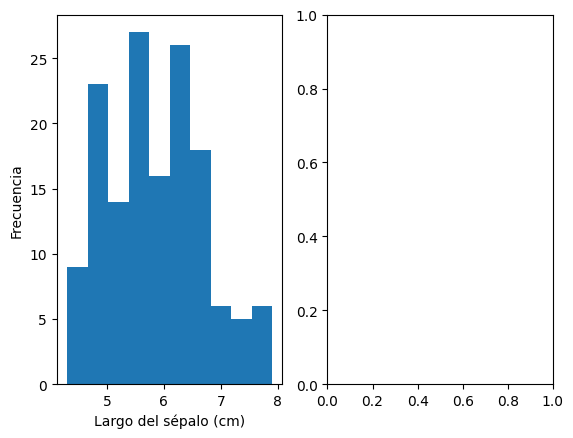

In [19]:
fig, axes = plt.subplots (1,2)

# Se gráfica solo sobre el axes[0]
axes[0].hist(iris['sepal_length']);
axes[0].set_xlabel('Largo del sépalo (cm)')
axes[0].set_ylabel('Frecuencia')

Text(0, 0.5, 'largo del pétalo')

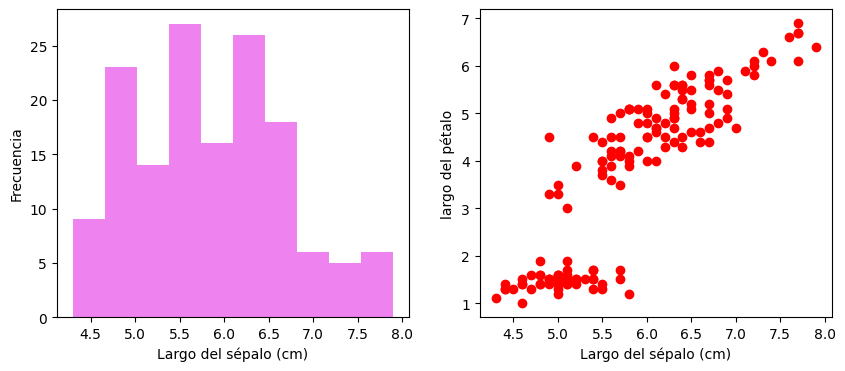

In [20]:
fig, axes = plt.subplots (1,2, figsize = (10,4)) # Aumentamos el tamaño del lienzo

# Grafica 1, histograma. Todo se agrega sobre axes[0]

axes[0].hist(iris['sepal_length'],  # datos
             bins = 10,             # cantidad de barras
             color = 'violet');     # color
axes[0].set_xlabel('Largo del sépalo (cm)')
axes[0].set_ylabel('Frecuencia')


# Grafica 2, diagrama de dispersión. Todo se agrega sobre axes[1]

axes[1].scatter(iris['sepal_length'], # grafico de dispersion
             iris['petal_length'],
             marker = 'o',            # se puede modificar el marcador
             color = 'red');
axes[1].set_xlabel('Largo del sépalo (cm)')
axes[1].set_ylabel('largo del pétalo')

Por último, durante el proceso de análisis y manipulación de datos resulta útil generar gráficas de procesamiento o cálculos realizados sobre los datos, pandas y su integración con matplotlib permite graficar directamente desde objetos DataFrame, a continuación se muestra un ejemplo.

In [21]:
iris.groupby('species').mean() # Crear una tabla agrupando por la especie de flor, para cada combinación de variables calcula la media

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


Text(0, 0.5, 'Especie de la flor')

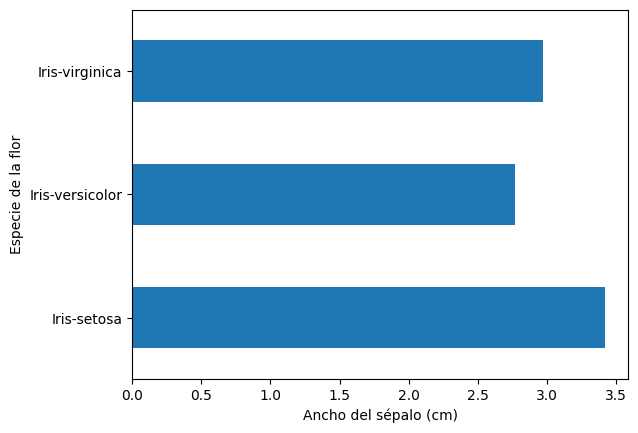

In [22]:
# A partir de un dataframe se pueden crear graficas usando matplotlib
# bar y barh hace referencia a gráficos de barras

iris.groupby('species').mean()['sepal_width'].plot(kind = 'barh')
#plt.xticks(rotation = 0)
plt.xlabel('Ancho del sépalo (cm)')
plt.ylabel('Especie de la flor')

## **4. Seaborn**

Seaborn es una librería de Python orientada a la construcción de visualizaciones, Seaborn está construida sobre matplotlib, por lo tanto, las propiedades vistas previamente también serán aplicables sobre Seaborn. Esta libreria permite construir visualizaciones muy atractivas con poco código y facilidad.

In [23]:
# Se define el estilo por defecto
sns.set_theme('notebook', palette = 'bright')

### Histogramas

Con el histograma podemos hacer tanto análisis univariado como bivariado. Con este tipo de visualización se busca conocer y describir la distribución de variables cuantitativas, es valiosa también para la busqueda de valores atípicos.

Text(0, 0.5, 'Frecuencia')

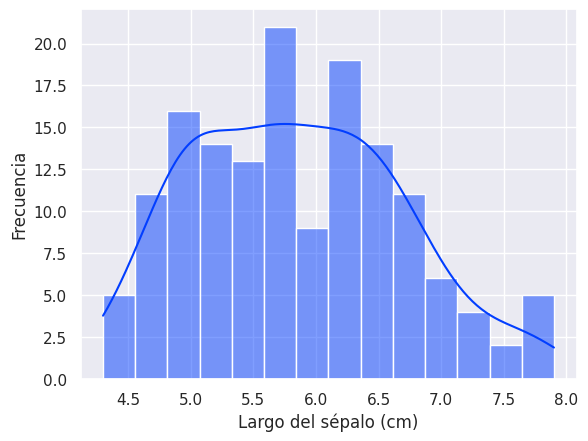

In [24]:
# Histograma simple

sns.histplot(data = iris,       # datos
            x = 'sepal_length', # variable
            bins= 14,           # cantidad de barras
            kde = True)         # kernel density estimation (opcional)

plt.xlabel('Largo del sépalo (cm)')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

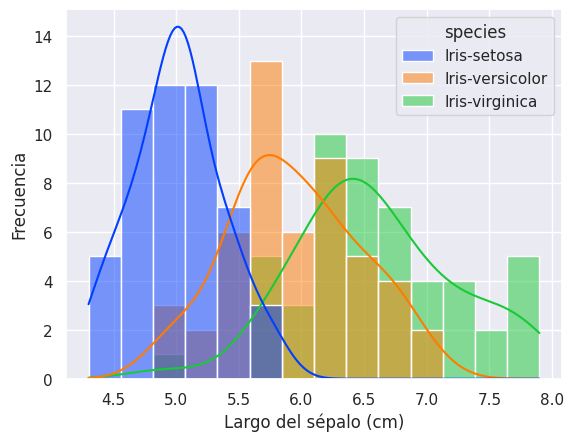

In [25]:
# Codificando una variable cualitativa dentro de un histograma

sns.histplot(data = iris,
            x = 'sepal_length',
            bins= 14,
            kde = True,
            hue = 'species')  # se añade otra variable a la visualización

plt.xlabel('Largo del sépalo (cm)')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

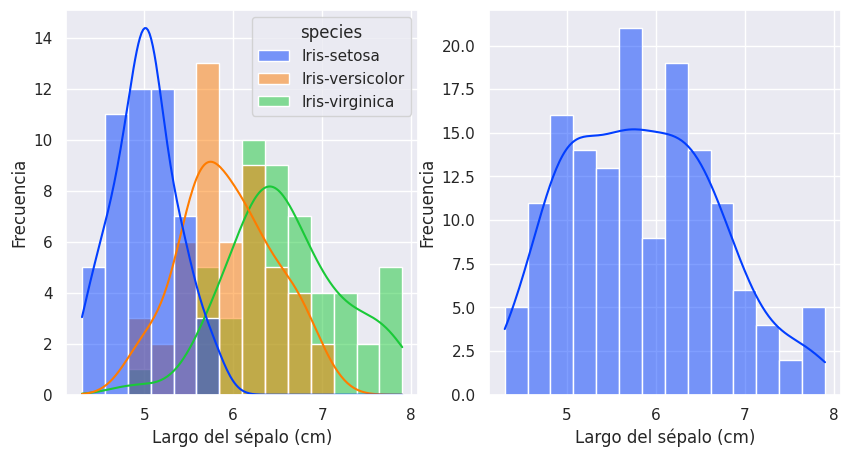

In [26]:
# Codificando una variable cualitativa dentro de un histograma
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.histplot(data = iris,
            x = 'sepal_length',
            bins= 14,
            kde = True,
            hue = 'species',  # se añade otra variable a la visualización
            ax = ax[0])

ax[0].set_xlabel('Largo del sépalo (cm)')
ax[0].set_ylabel('Frecuencia')

sns.histplot(data = iris,
            x = 'sepal_length',
            bins= 14,
            kde = True,
            ax = ax[1])  # se añade otra variable a la visualización

ax[1].set_xlabel('Largo del sépalo (cm)')
ax[1].set_ylabel('Frecuencia')

<Axes: xlabel='price', ylabel='Count'>

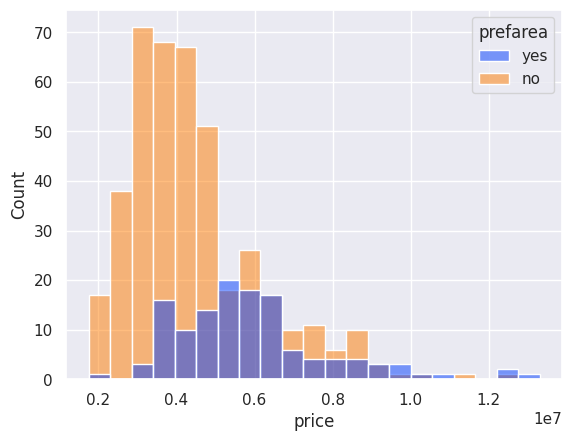

In [27]:
sns.histplot(data = housing,
             x = 'price',
             hue = 'prefarea')

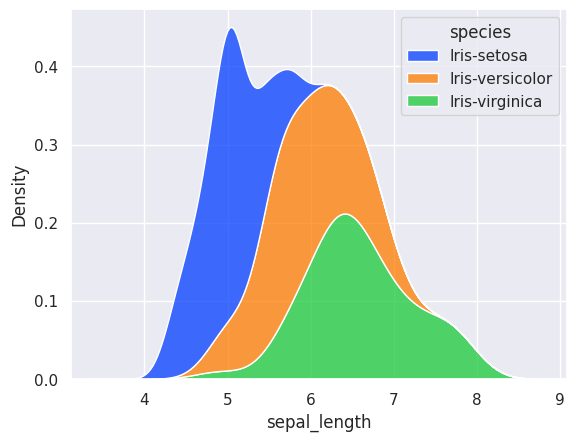

In [52]:
sns.kdeplot(data=iris,    #Set de datos
            x="sepal_length",  #Variable a graficar
            hue="species",     #códificación por especie
            multiple="stack"   #Apilación de las distrubuciones
            );

### Diagramas de barras

Los diagramas de barras son útiles para visualizar la distribución de una variable categórica, en ese caso lo que hacemos son conteos. También permite evaluar la agregación de una variable cuantitativa y su relación con una variable cualitativa.

<Axes: xlabel='species', ylabel='count'>

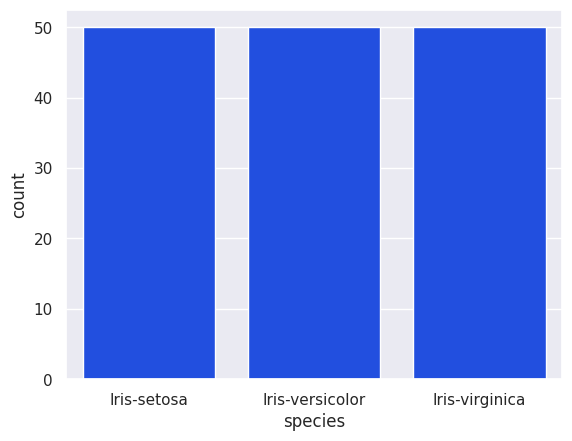

In [29]:
# Conteo, distribución de variable cualitativa

sns.countplot(data = iris,
             x = 'species')

Para seaborn contamos con  gran variedad de paletas de colores disponibles, estas se pueden pasar a la función a través del parámetro `palette`. Para consultar las paletas disponibles consulte: https://seaborn.pydata.org/tutorial/color_palettes.html

<Axes: xlabel='furnishingstatus', ylabel='count'>

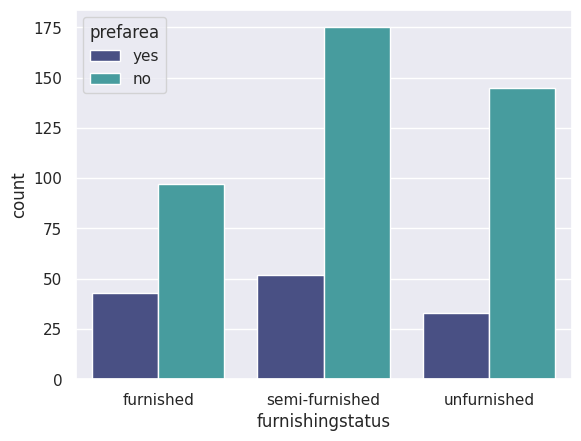

In [30]:
# Distribución de frecuencia de dos variables cualitativas

sns.countplot(data = housing,
             x = 'furnishingstatus',
             hue ='prefarea' ,
             palette = 'mako')

<Axes: xlabel='parking', ylabel='count'>

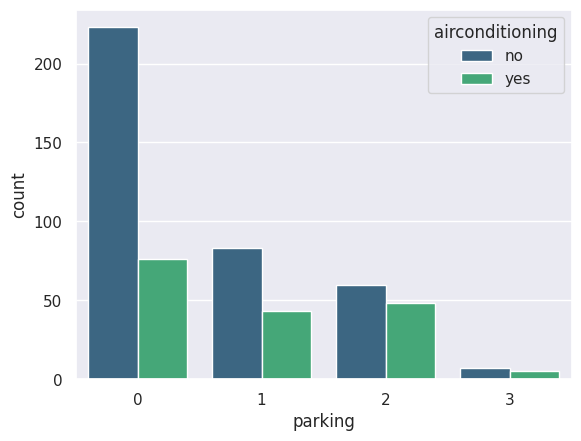

In [31]:
# Distribución de frecuencia de dos variables cualitativas

sns.countplot(data = housing,
             x = 'parking',
             hue = 'airconditioning',
             palette = 'viridis')

<ipython-input-32-6bbb0d3d12c1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = housing,


<Axes: xlabel='bedrooms', ylabel='price'>

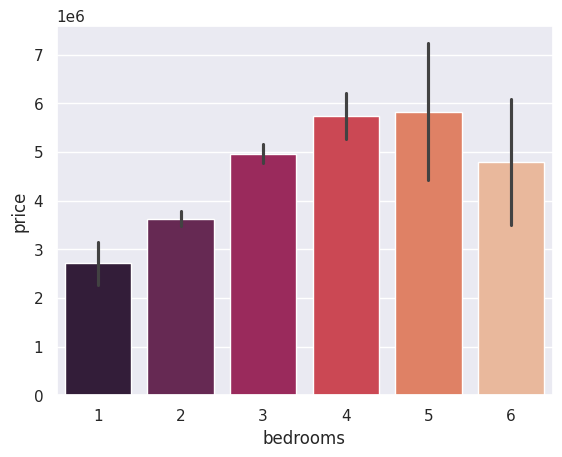

In [32]:
# Relación entre el promedio del precio y el número de habitaciones
# Por defecto calcula el promedio del precio para cada categoría

sns.barplot(data = housing,
           x = 'bedrooms', # cuantitativa discreta
           y = 'price',
           palette = 'rocket')

<Axes: xlabel='bedrooms', ylabel='price'>

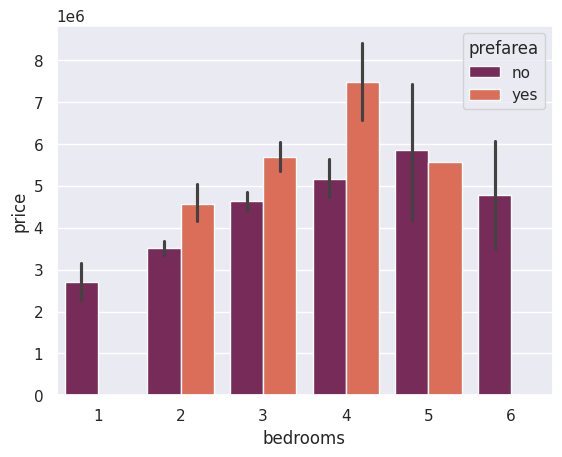

In [33]:
# Añadimos una codificación adicional para evaluar el efecto de un área preferencial

sns.barplot(data = housing,
           x = 'bedrooms',
           y = 'price',
           hue = 'prefarea',
           palette = 'rocket')

### Boxplot

El boxplot presenta un resumen estadístico muy valioso, es útil para el análisis univariado en la busqueda de anomalias y en la descripción general de la distribución. También es útil para hacer análisis bivariado al ser combinado con variables cualitativas.

El boxplot muestra:

* Percentil 25 o cuartil 1

* Percentil 50, cuartil 2 o mediana

* Percentil 75 o cuartil 3

* Rango intercuartílico

* Bigotes - 1.5 veces el rango intercuartílico

* Valores atípicos, aquellos valores fuera de los bigotes

* De manera opcional el boxplot puede mostrar también la media

<Axes: ylabel='area'>

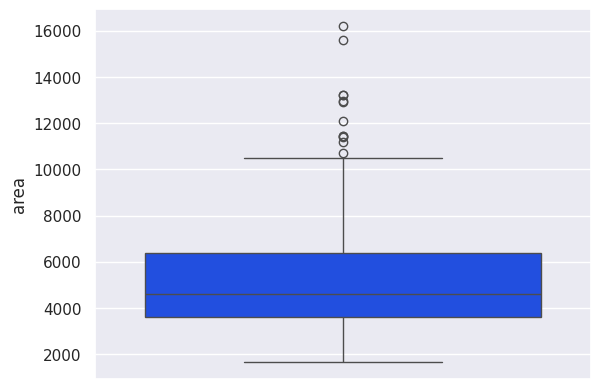

In [34]:
sns.boxplot(data = housing,
            y = 'area')

<Axes: xlabel='mainroad', ylabel='price'>

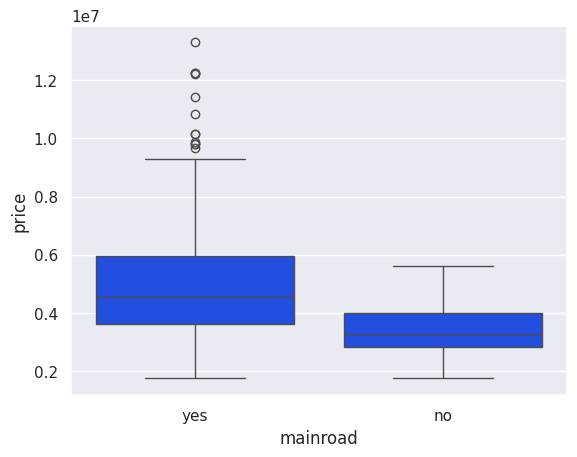

In [35]:
# Codificación adicional para ver el impacto de la cercania a una calle principal y el precio

sns.boxplot(data = housing,
           y = 'price',
           x = 'mainroad')

<Axes: xlabel='mainroad', ylabel='price'>

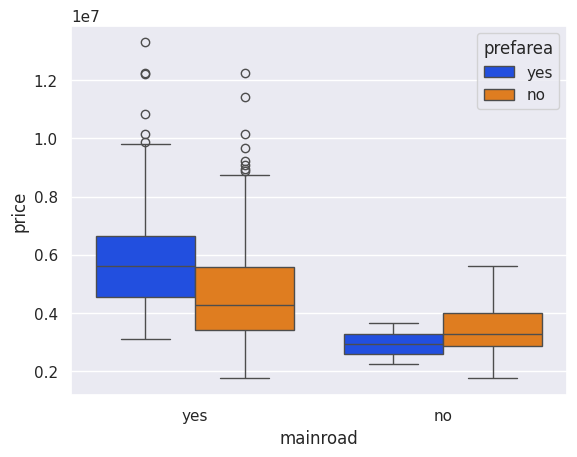

In [36]:
# Ahora evaluemos también la relación del precio respecto a la ubicación de la vivienda

sns.boxplot(data = housing,
           y = 'price',
           x = 'mainroad',
           hue = 'prefarea')

Por último ,evaluemos la relación existente entre el número de habitaciones con el área y con el precio de la vivienda, aprovechemos las virtudes de matplotlib para hacer una doble visualización.

<ipython-input-37-e03ec9e36a61>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = housing,
<ipython-input-37-e03ec9e36a61>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = housing,


Text(0.5, 1.0, 'Relación entre el número de habitaciones y el área')

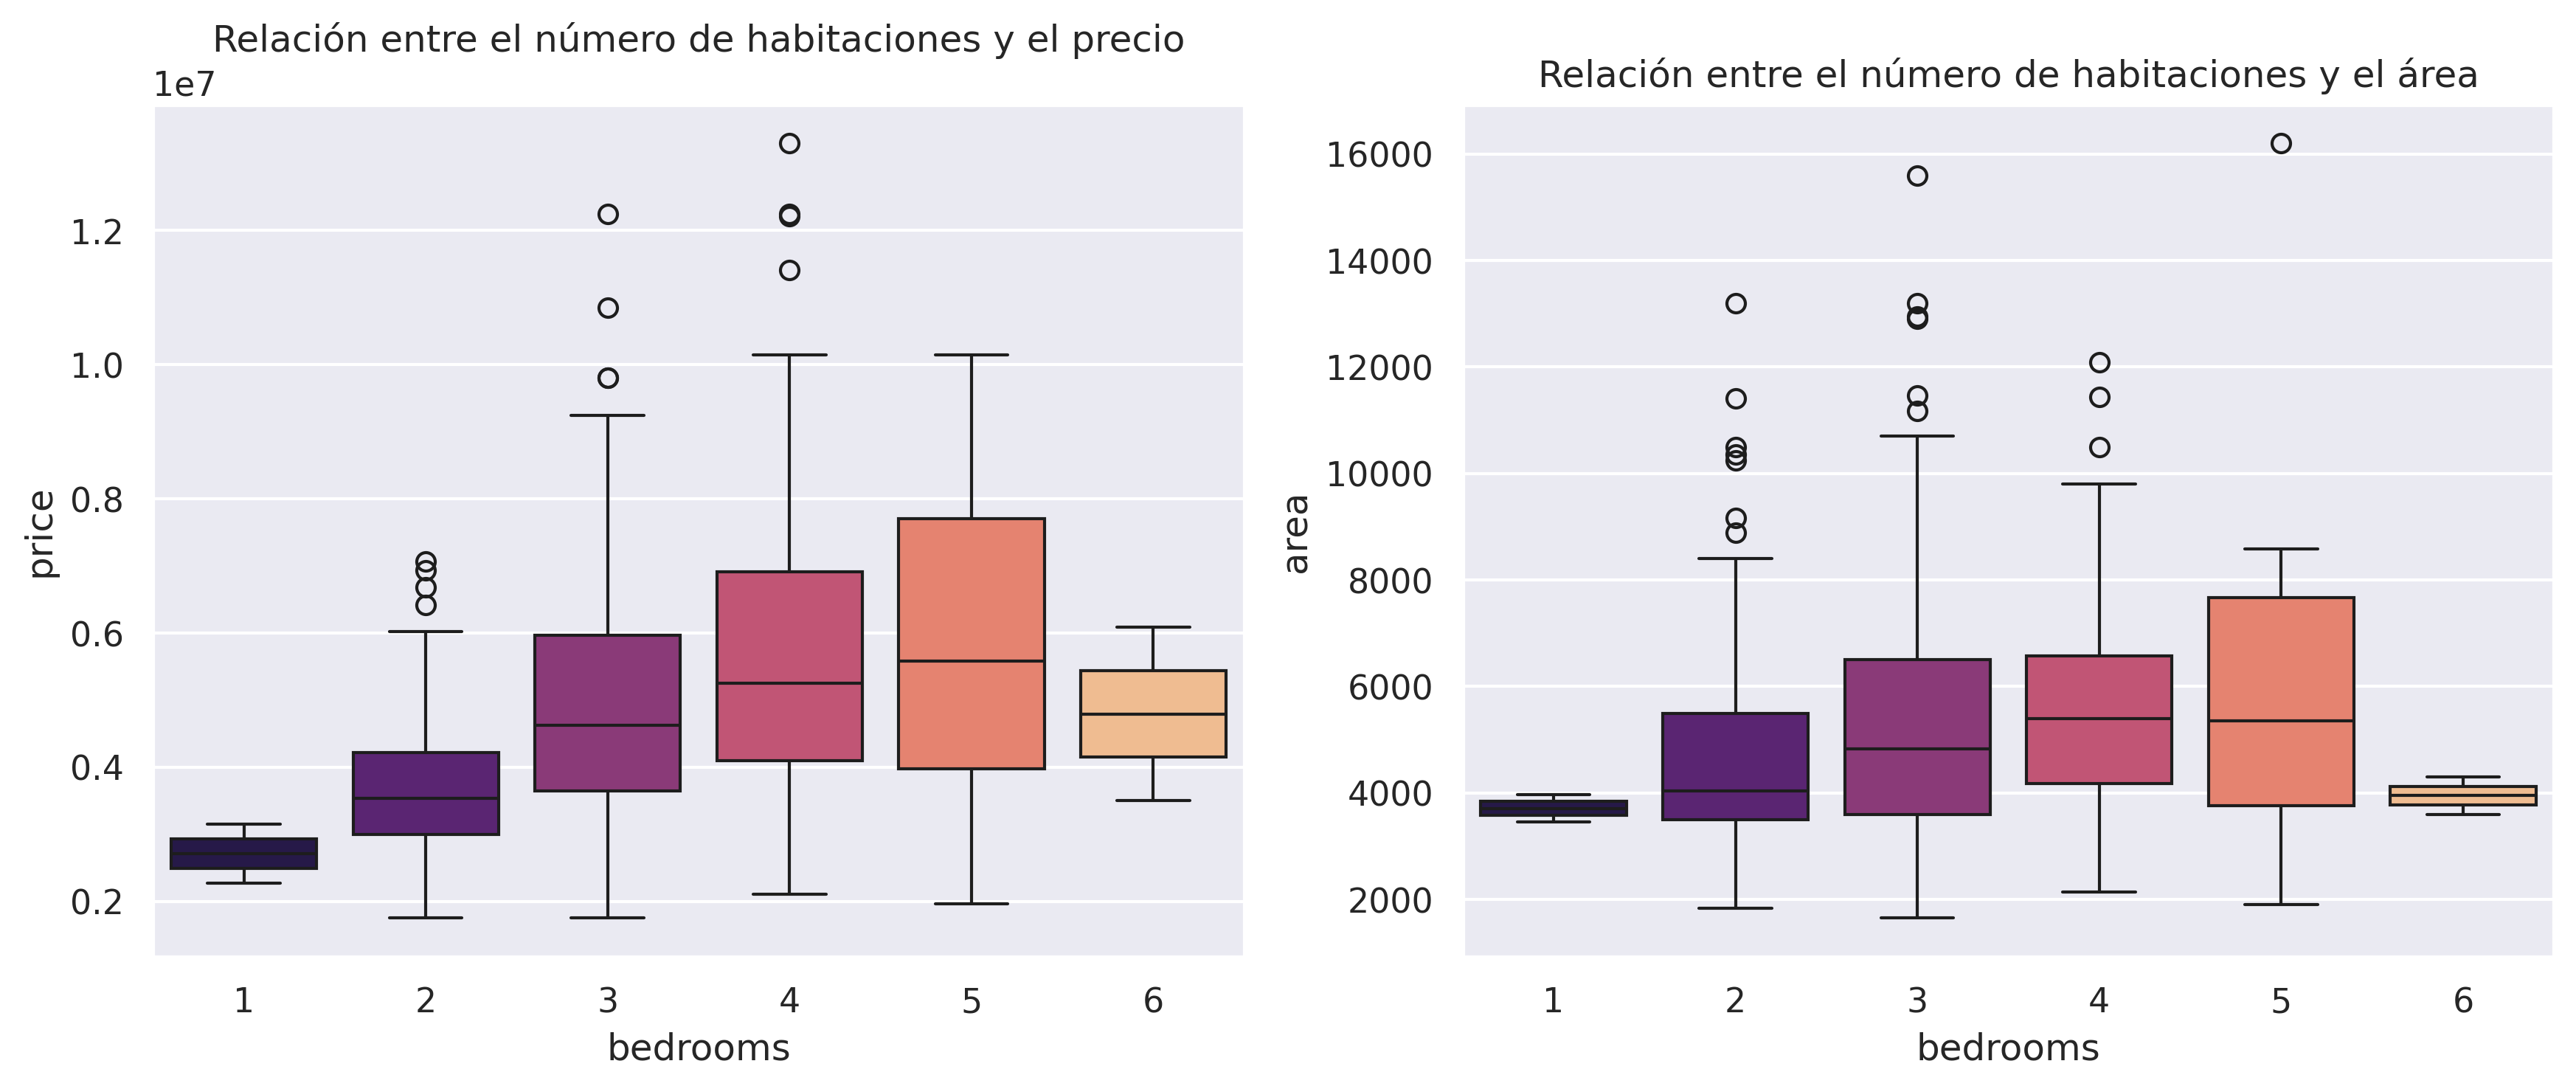

In [37]:
# Esta es otra forma de declarar los axis, se declaran sobre una tupla

fig, (ax1, ax2) = plt.subplots(1,2, dpi = 300, figsize = (14,5))

sns.boxplot(data = housing,
           x='bedrooms',
           y = 'price',
           palette = 'magma',
           ax = ax1) # este argumento determina sobre que axis se grafica

sns.boxplot(data = housing,
           x = 'bedrooms',
           y = 'area',
           palette = 'magma',
           ax = ax2) # este argumento determina sobre que axis se grafica

ax1.set_title('Relación entre el número de habitaciones y el precio')
ax2.set_title('Relación entre el número de habitaciones y el área')

In [38]:
housing['bedrooms'].value_counts(normalize = True)*100

,proportion
bedrooms,
3,55.045872
2,24.954128
4,17.431193
5,1.834862
6,0.366972
1,0.366972


### Diagramas de dispersión



Los diagramas de dispersión sirven para analizar relaciones entre dos variables cuantitativas. Se pueden añadir codificaciones de color, tamaño o forma para ver la influencia de variables cualitativas.


<Axes: xlabel='area', ylabel='price'>

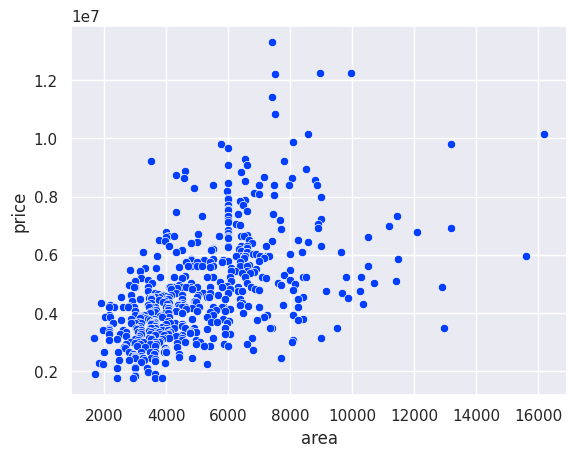

In [39]:
sns.scatterplot(data=housing,
               x = 'area',
               y = 'price')

<Axes: xlabel='area', ylabel='price'>

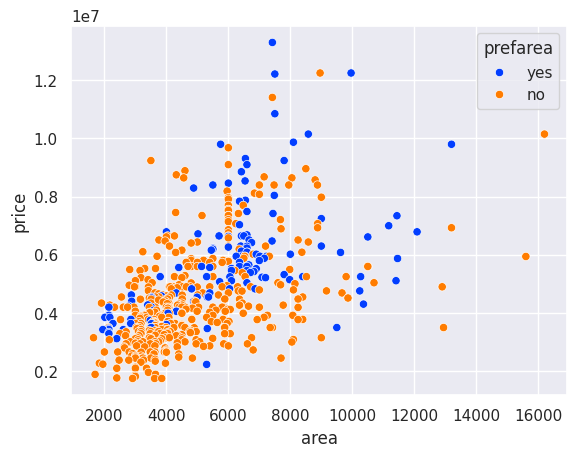

In [40]:
# Añadimos una codificación por color de acuerdo a la ubicación de la vivienda

sns.scatterplot(data=housing,
                x = 'area',
                y = 'price',
                hue = 'prefarea')

<Axes: xlabel='area', ylabel='price'>

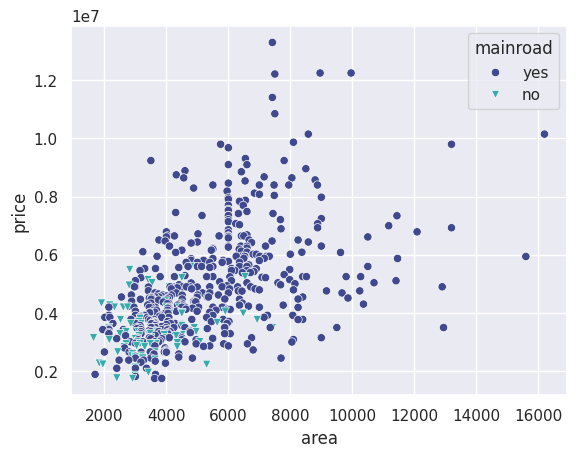

In [41]:
# Añadimos una segunda modificación sobre la misma variable

sns.scatterplot(data=housing,
                x = 'area',
                y = 'price',
                hue = 'mainroad',
                style = 'mainroad',
                palette = 'mako',
                markers = ['o','v'])

Otro método útil es `lmplot()`, este método permite gráfica modelos de regresión lineal.



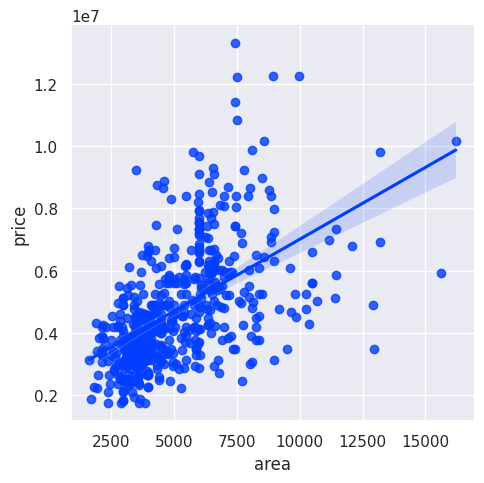

In [42]:
sns.lmplot(data = housing,
           x = 'area',
           y = 'price')

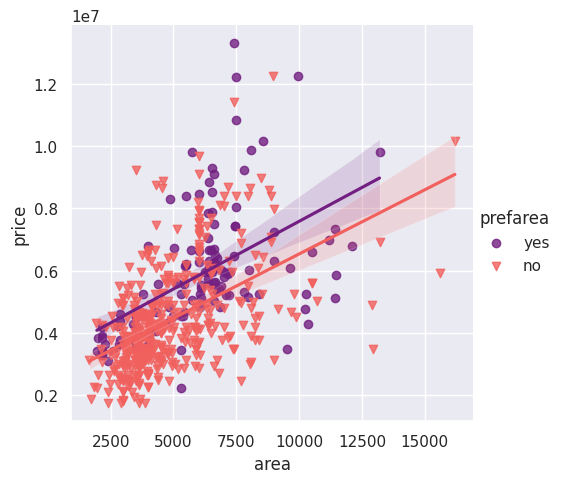

In [43]:
sns.lmplot(data = housing,
           x = 'area',
           y = 'price',
           hue = 'prefarea',
           palette = 'magma',
           markers = ['o','v'])

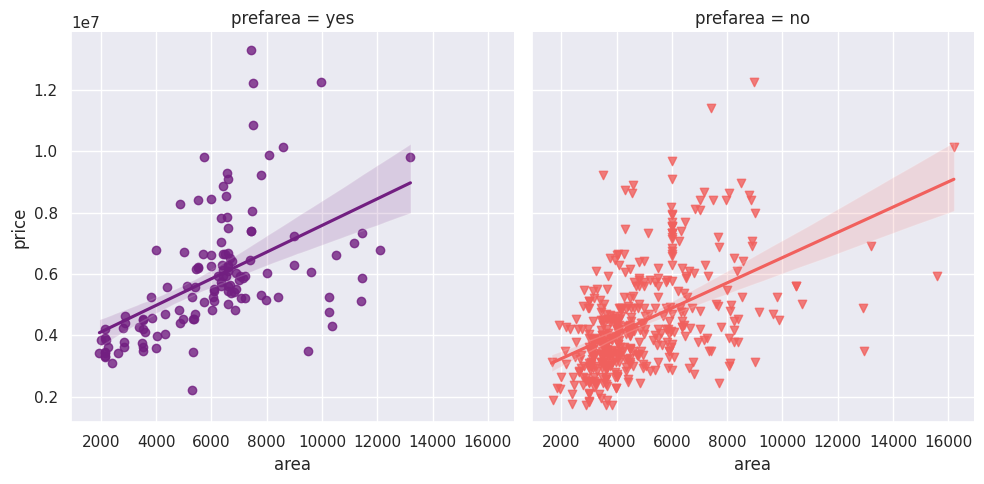

In [44]:
sns.lmplot(data = housing,
           x = 'area',
           y = 'price',
           hue = 'prefarea',
           palette = 'magma',
           markers = ['o','v'],
           col = 'prefarea') # Crea nuevas columnas en el lienzo en función de los niveles de la variable codificada

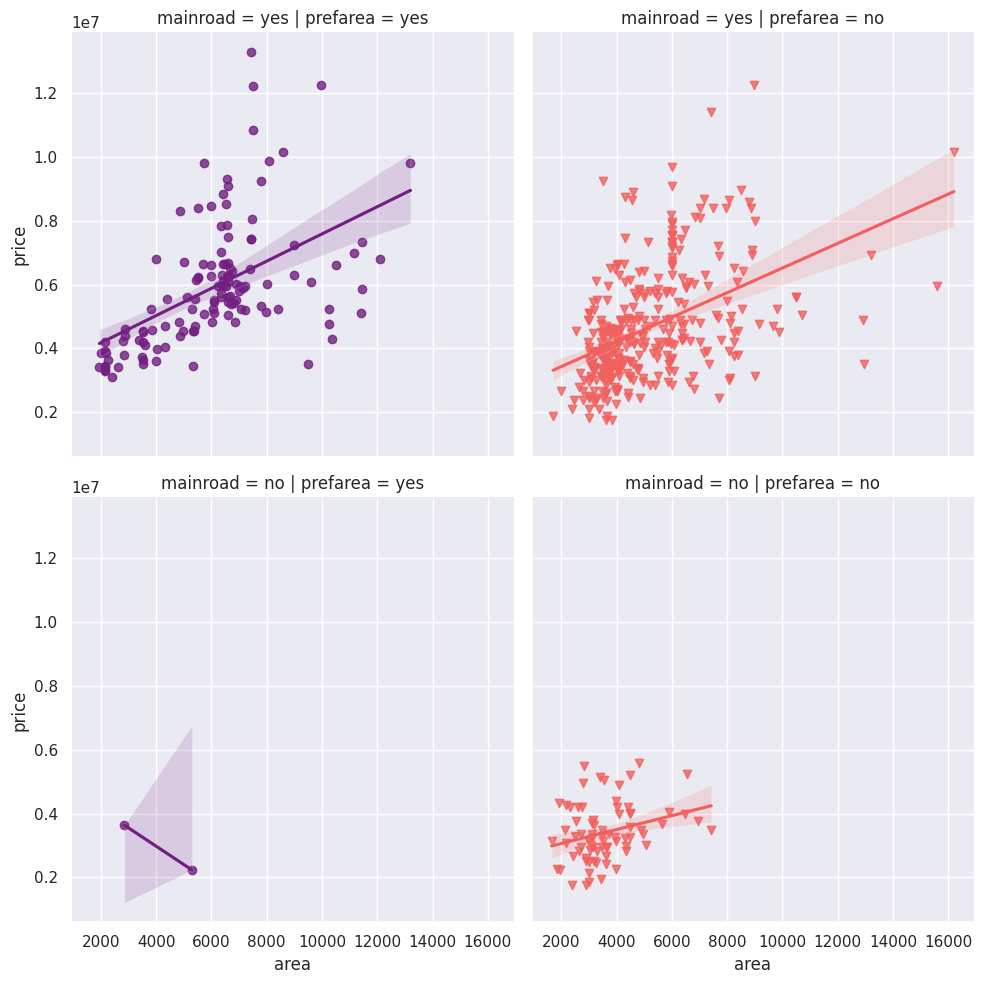

In [45]:
sns.lmplot(data = housing,
           x = 'area',
           y = 'price',
           hue = 'prefarea',
           palette = 'magma',
           markers = ['o','v'],
           col = 'prefarea',  # Crea nuevas columnas en el lienzo en función de los niveles de la variable codificada
           row = 'mainroad')  # Crea nuevas filas en el lienzo en función de los niveles de la variable codificada

Por último se describe la gráfica pair, este tipo de gráficas son muy útiles ya que muestran tanto las distribuciones como las relaciones existentes entre cada par de variables cuantitativas. Para mayor información sobre la función pairplot consulte:

https://seaborn.pydata.org/generated/seaborn.pairplot.html

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

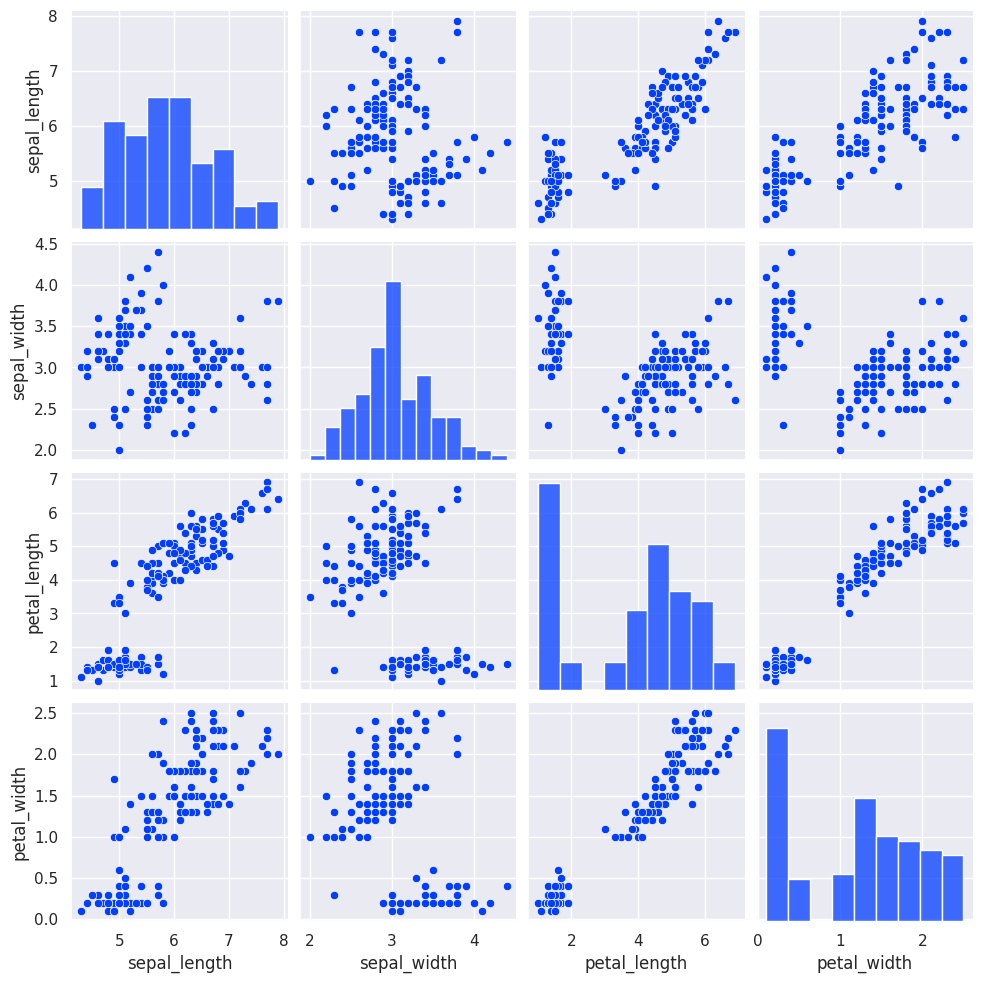

In [46]:
sns.pairplot(data = iris,
            palette = 'mako')

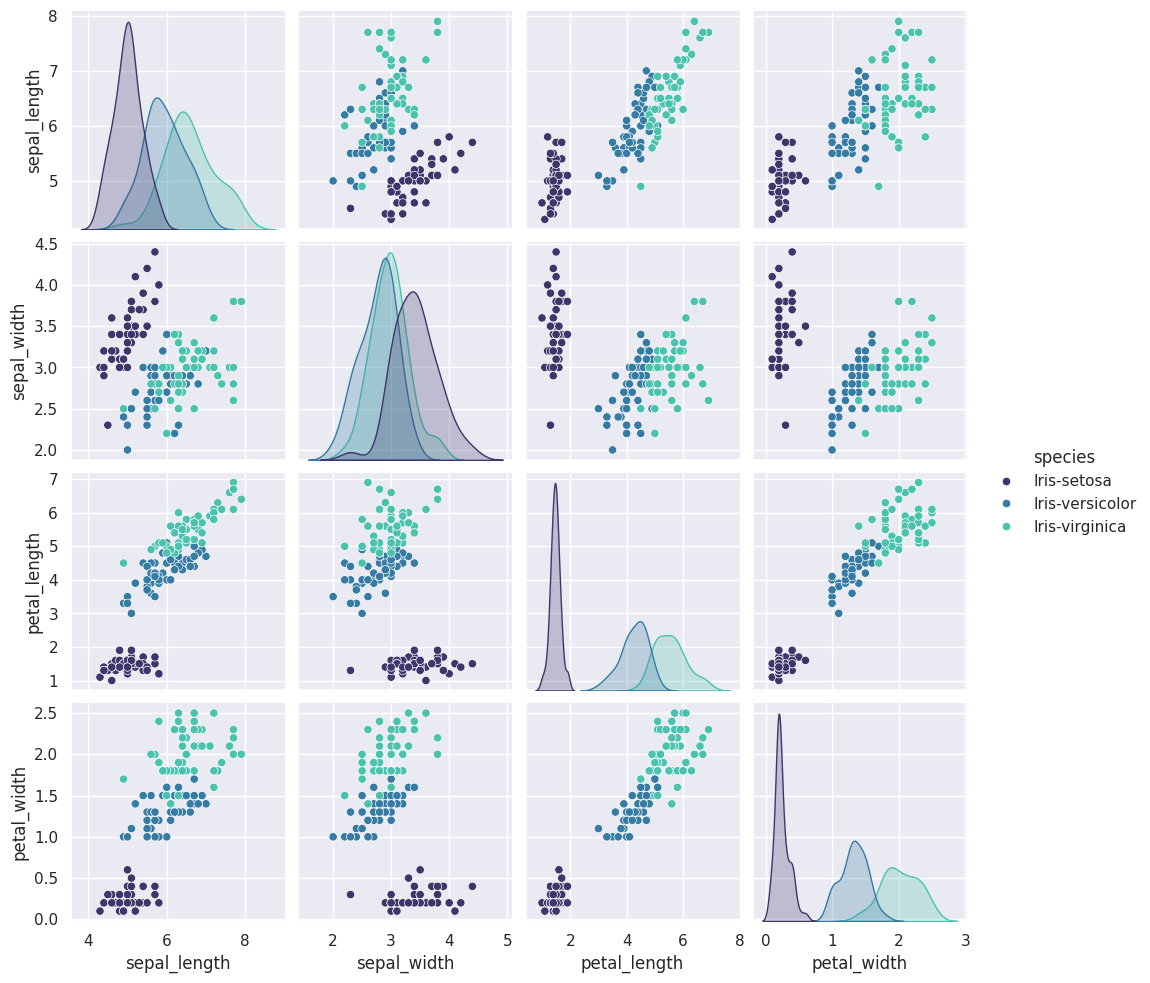

In [47]:
sns.pairplot(data = iris,
            hue = 'species', # se añade una codificación
            palette = 'mako')

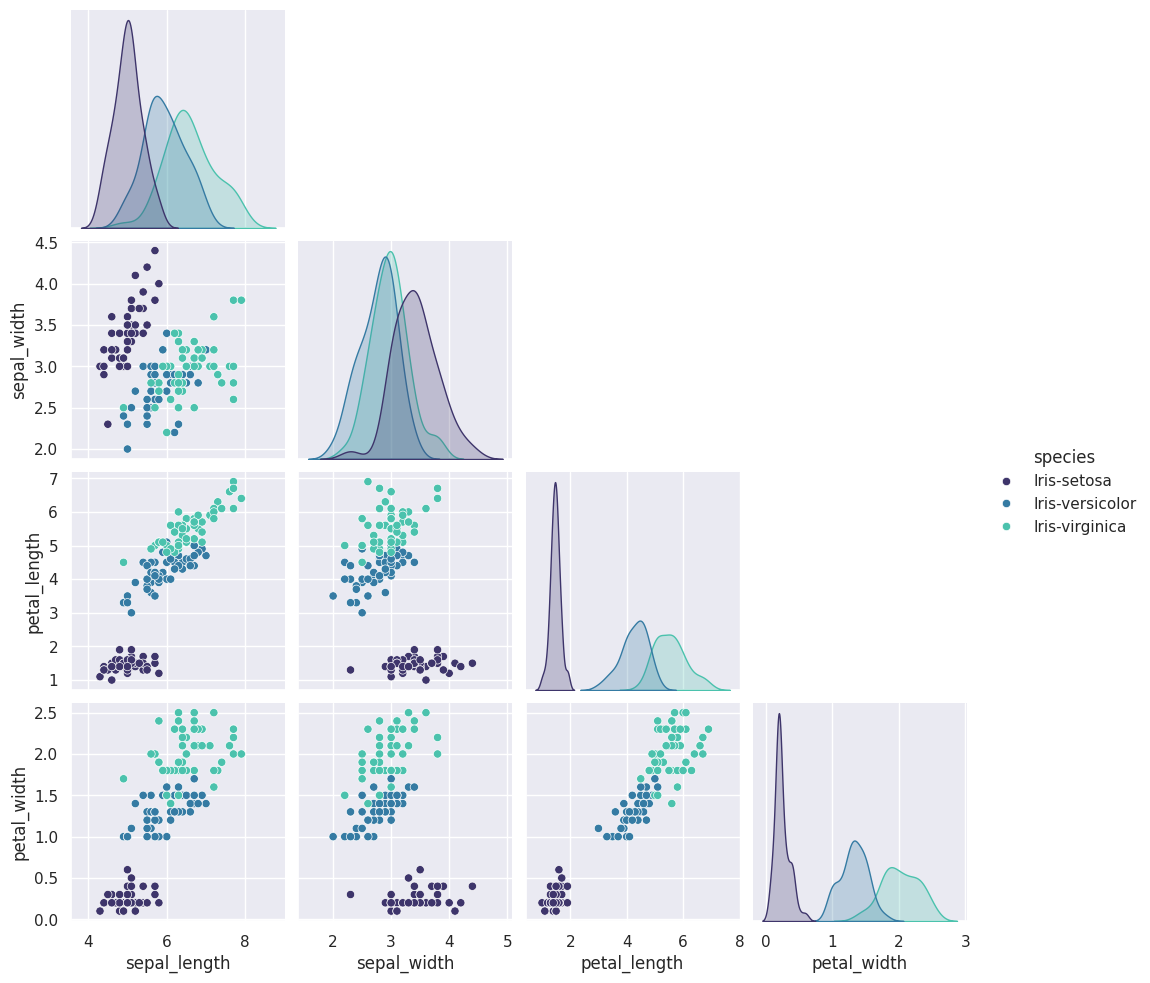

In [48]:
sns.pairplot(data = iris,
            hue = 'species',
            corner = True, # para simplificar la gráfica solo se muestran la mitad de los gráficos
            palette = 'mako');

## **Recursos adicionales**

* Hojas trampa - https://github.com/matplotlib/
cheatsheets
* From Data to Viz - https://www.data-to-viz.com/
* *Matplotlib*: Visualization with Python - http://www.matplotlib.org
* Matplotlib Gallery - (Ejemplos) - https://matplotlib.org/stable/gallery/index.html - Se recomienda revisar la galería y ajustar el código de las visualizaciones requeridas.
* Datacamp: Introduction to Data Visualization with *Matplotlib* - https://www.datacamp.com/courses/introduction-to-matplotlib
* Coursera: Data visualization with Python - https://www.coursera.org/learn/python-for-data-visualization

## **Créditos**
---

**Profesor:** Harry Vargas Rodríguez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*